# Redshift Data of DESIJ1709+3154

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 26.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ17093154_F140W_drz_sci.fits", header=True
)

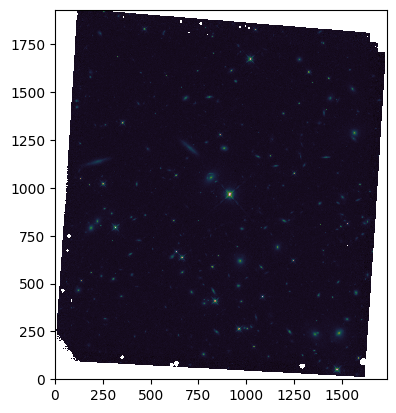

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [ ]:
# need to be changed for each cluster file
FILENAME = "/kaggle/input/redshift-desij1709-3154/redshift_DESIJ17093154_updated.csv"
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.013011,8000506465000323,257.434380,31.891464,8000,506465,323,EXP,0.003,E6,0.661,0.073,0,0
1,0.012550,8000506465000345,257.430973,31.892055,8000,506465,345,REX,0.002,R4,0.574,0.043,1,1
2,0.011889,8000506465000347,257.429828,31.892934,8000,506465,347,PSF,0.158,P7,1.079,0.315,1,1
3,0.013563,8000506465000366,257.437372,31.891322,8000,506465,366,REX,0.001,R4,0.744,0.059,1,1
4,0.010237,8000506465000413,257.434482,31.894254,8000,506465,413,PSF,0.999,P4,2.215,1.647,1,0


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 257.4333333, 31.9044444  # RA 17:09:44 DEC 31:54:16
radii = 45  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

389.8590925653944 1344.9062619015453


In [8]:
data_legacy_cropped = data_legacy[
    (data_legacy["RAJ2000"] < x_upper)
    & (data_legacy["RAJ2000"] > x_lower)
    & (data_legacy["DEJ2000"] < y_upper)
    & (data_legacy["DEJ2000"] > y_lower)
]

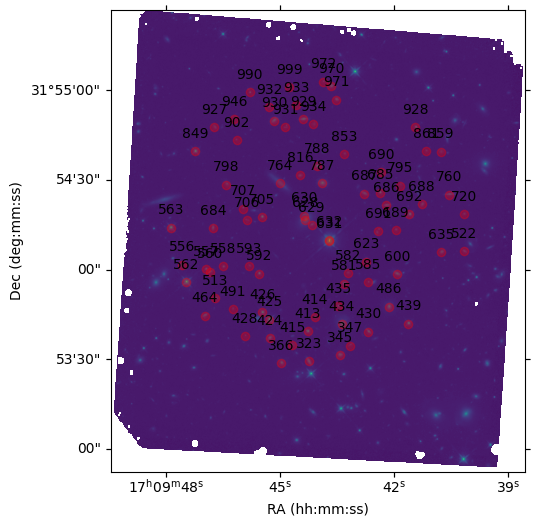

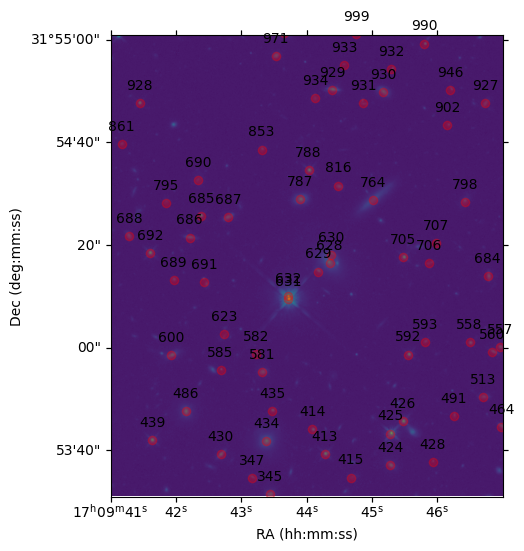

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 628
object_ids = [central_deflector_id, 629, 630, 787, 764]

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r     RAJ2000    DEJ2000  type  pstar gmmcomp  zphot  e_zphot
objid                                                                      
628    0.001241  257.434787  31.904580  COMP  0.022      C0  0.720    0.083
629    0.000680  257.434036  31.904119   REX  0.001      R7  0.950    0.246
630    0.001445  257.434902  31.905003   DEV  0.020      D6  0.609    0.106
764    0.005049  257.437548  31.908007   EXP  0.103      E4  0.103    0.041
787    0.003592  257.432918  31.908019   REX  0.002      R4  0.561    0.067


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z)
    | (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.72
del_z: 0.0516
             _r     RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
345    0.012550  257.430973  31.892055  REX  0.002      R4  0.574    0.043
347    0.011889  257.429828  31.892934  PSF  0.158      P7  1.079    0.315
413    0.010237  257.434482  31.894254  PSF  0.999      P4  2.215    1.647
414    0.008877  257.433691  31.895572  PSF  0.857      P3  0.603    0.161
415    0.011719  257.436152  31.892973  REX  0.002      R7  1.047    0.206
425    0.010161  257.438669  31.895349  PSF  1.000      P2  1.589    2.221
426    0.009903  257.439455  31.896014  PSF  0.031      P2  1.890    1.475
428    0.012629  257.441360  31.893811  PSF  0.001      P5  1.511    0.524
430    0.011224  257.427851  31.894231  PSF  0.000      P3  0.961    0.310
434    0.009753  257.430736  31.894944  DEV  0.000      D9  0.578    0.034
439    0.012626  257.423486  31.894983  PSF  0.901      P2  1.01

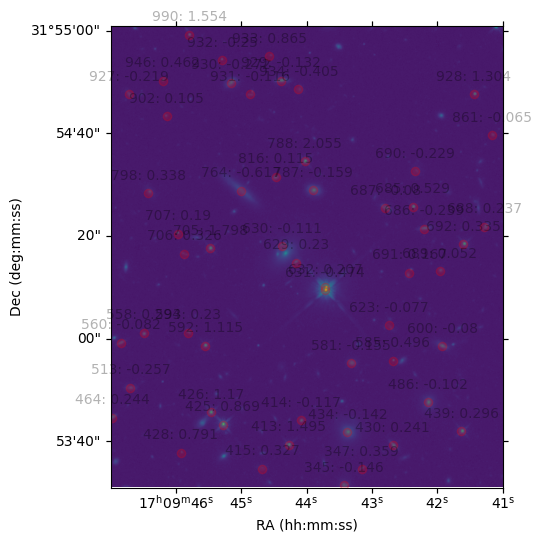

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.2
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[
        i
    ]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
        alpha=0.3,
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ17093154_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id, "zphot"]
e_zphot = selected_data_legacy.loc[central_deflector_id, "e_zphot"]

environment_variables = {"z_phot": [z_phot, e_zphot]}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)